##Elaborado por:


*   Andres Felipe Gomez Alzate
*   Jhoan Camilo Eusse Duque

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [0]:
#Importando los datos
Datos=pd.read_csv("./data.csv")
DatosArray=np.array(Datos)
#Separando los datos.
Time=DatosArray[:,0]
X=DatosArray[:,1]
Y=DatosArray[:,2]

In [0]:
#Definiento curva teórica a ajustar
def FA(a,b,c,d,e,g,Time):
    FA=[]
    for i in range(len(Time)):
        f=a*np.sin(2*np.pi*e*Time[i]+b)+c*np.sin(2*np.pi*g*Time[i]+d)
        FA.append(f)
    return np.array(FA)

#Definiendo ecuación Chi cuadrado
def Chi(xe,xt): #xe=experimental, xt=teorico
    chi=[]
    for i in range(len(xe)):
        chi_s = ((xe[i]-xt[i])**2)/abs(xe[i])
        chi.append(chi_s)
    return np.array(chi)

In [0]:
#Definiendo iteración sobre datos y Chi cuadrado míínimo

def chi_loop(s):
  
  if s==1:
    var=Y
    A=AA
    B=BB
    C=CC
    D=DD
    E=EE
    F=FF
    ñ="Y"

  elif s==0:
    var=X
    A=Aa
    B=Bb
    C=Cc
    D=Dd
    E=Ee
    F=Ff
    ñ="X"
    
  chi=[]
  parametros=[]
  for i in  range(len(A)):
      for j in range(len(B)):
          for k in range(len(C)):
              for l in range(len(D)):
                  for m in range(len(E)):
                      for n in range(len(F)):
                          a=[]
                          fa=FA(A[i],B[j],C[k],D[l],E[m],F[n],Time)
                          CH=Chi(var,fa)
                          chi.append(np.sum(CH))
                          a.append(A[i])
                          a.append(B[j])
                          a.append(C[k])
                          a.append(D[l])
                          a.append(E[m])
                          a.append(F[n])
                          parametros.append(a)

  Minimo=min(chi)
  print("Chi cuadrado mínimo para {} : {}".format(ñ,Minimo/10000))
  for p in range(len(parametros)):
      if chi[p]== Minimo:
          print("Lista de parametros optimos [a,b,c,d,e,g]:")
          print(parametros[p])
          #print(p)
          plt.plot(Time,var,"gray",label="Experimental")
          plt.plot(Time,FA(parametros[p][0],parametros[p][1],parametros[p][2],parametros[p][3],parametros[p][4],parametros[p][5],Time),"red", label="Teórica")
          plt.xlabel("tiempo")
          plt.ylabel("{}".format(ñ))
          plt.title("{} en función del tiempo".format(ñ))
          plt.legend()
          plt.grid()
          plt.show()

Chi cuadrado mínimo para X : 1.13926069783229
Lista de parametros optimos [a,b,c,d,e,g]:
[1.3, 1.0471975511965976, 1.0, -1.5707963267948966, 8.0, 0.5]


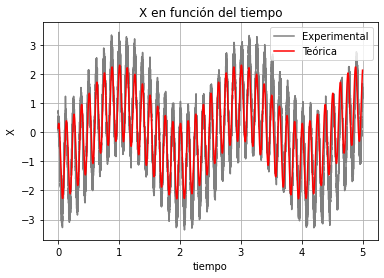

Chi cuadrado mínimo para Y : 2.354471192833203
Lista de parametros optimos [a,b,c,d,e,g]:
[1.6, -0.9333333333333333, 1.1333333333333333, -2.066666666666667, 7.9, 0.5]


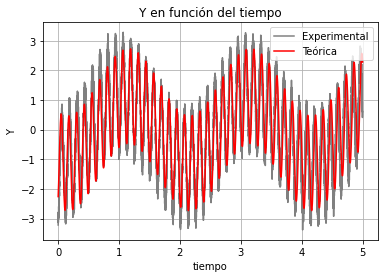

In [7]:
#Ajustando datos experimentales a curvas teóricas

# Parametros X
Aa=np.linspace(1.3,3,4)#Amplitud 1
Bb= np.array([np.pi/2,np.pi,-np.pi/2,-np.pi,np.pi/4,-np.pi/4,-np.pi/6,np.pi/6,-np.pi/3,np.pi/3]) #Fase 1
Cc= np.linspace(1,2,4) #Amplitud 2
Dd= np.array([np.pi/2,np.pi,-np.pi/2,-np.pi,np.pi/4,-np.pi/4,np.pi/6,-np.pi/6,-np.pi/3,np.pi/3]) #Fase 2
Ee=np.array([7.9,8.0]) #Frecuencia 1
Ff=np.array([0.4,0.5]) #Frecuencia 2


# Parametros Y
AA=np.linspace(1.6,3.0,4)#Amplitud 1
BB= np.linspace(-1.2,-0.8,4) #Fase 1
CC= np.linspace(1,1.4,4) #Amplitud 2
DD= np.linspace(-2.2,-1.8,4) #Fase 2
EE=np.array([7.7,7.9,8.0]) #Frecuencia 1
FF=np.array([0.3,0.4,0.5]) #Frecuencia 2

for i in range(2):
  chi_loop(i)

Coeficiente de Sperman: -0.37413904433451944
Coeficiente de Pearson: -0.33465352207120286


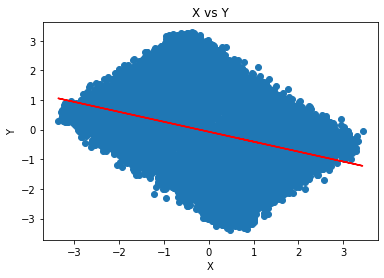

In [8]:
## Correlación entre variables

#Graficanco y en función de x
m,b = np.polyfit(X, Y, 1)
coef = np.polyfit(X,Y,1)
poly1d_fn = np.poly1d(coef)
plt.scatter(X,Y) 
plt.plot(X, poly1d_fn(X),"red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X vs Y")

#Coeficiente correlacion de Sperman 
corrs, _ = spearmanr(X, Y) 
print("Coeficiente de Sperman: {}".format(corrs))
#Coeficiente corelacion de Person
corrp, _ = pearsonr(X,Y) 
print("Coeficiente de Pearson: {}".format(corrp))